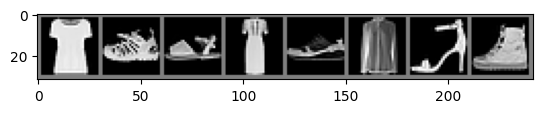

Epoch [1/10], Loss: 1.8098, Accuracy: 55.28%, Test Loss: 1.4311, Test Accuracy: 65.41%
Epoch [2/10], Loss: 1.2148, Accuracy: 68.98%, Test Loss: 1.0613, Test Accuracy: 70.47%
Epoch [3/10], Loss: 0.9611, Accuracy: 72.19%, Test Loss: 0.8971, Test Accuracy: 72.31%
Epoch [4/10], Loss: 0.8378, Accuracy: 73.85%, Test Loss: 0.8089, Test Accuracy: 73.79%
Epoch [5/10], Loss: 0.7664, Accuracy: 75.03%, Test Loss: 0.7547, Test Accuracy: 74.57%
Epoch [6/10], Loss: 0.7199, Accuracy: 75.83%, Test Loss: 0.7170, Test Accuracy: 75.60%
Epoch [7/10], Loss: 0.6863, Accuracy: 76.65%, Test Loss: 0.6890, Test Accuracy: 76.08%
Epoch [8/10], Loss: 0.6604, Accuracy: 77.31%, Test Loss: 0.6666, Test Accuracy: 76.75%
Epoch [9/10], Loss: 0.6396, Accuracy: 77.83%, Test Loss: 0.6489, Test Accuracy: 77.25%
Epoch [10/10], Loss: 0.6220, Accuracy: 78.44%, Test Loss: 0.6331, Test Accuracy: 77.56%


<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

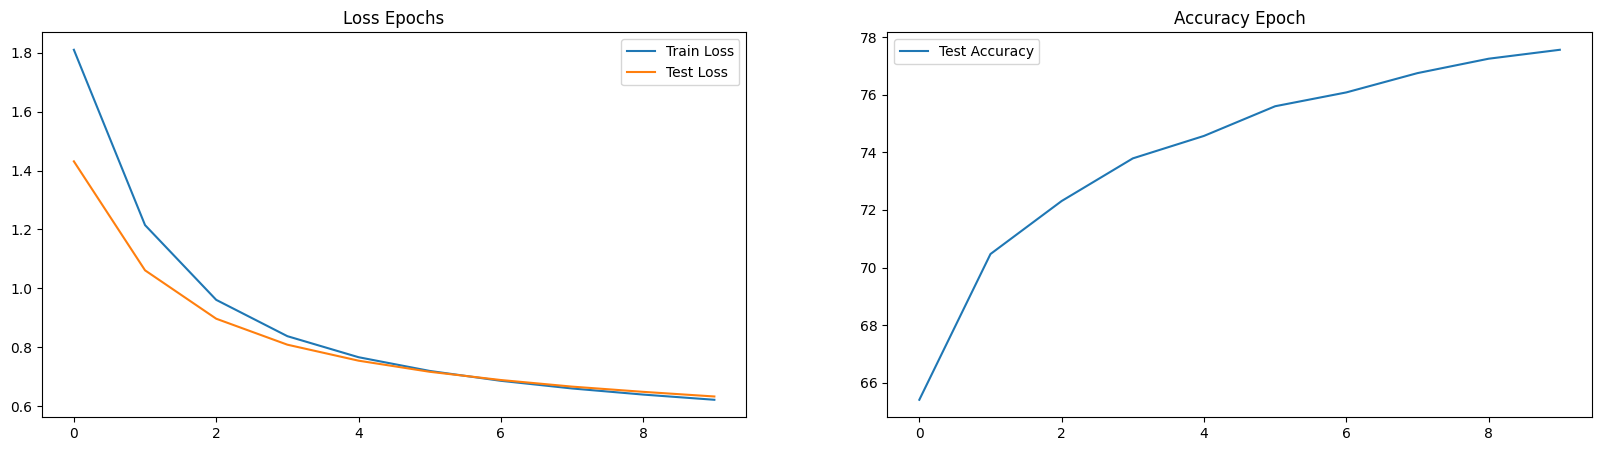

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = (0.5, ), std = (0.5, ))])
trainset = torchvision.datasets.FashionMNIST(root='D:/Downloads/DecisionTree_RandomForest', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, num_workers=8, shuffle=True)
testset = torchvision.datasets.FashionMNIST(root='D:/Downloads/DecisionTree_RandomForest', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, num_workers=8, shuffle=False)
def imshow(img):
    img = img * 0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:8]))
    break
def getModel(n_features):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_features, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ).to(device)
    return model
n_features = 28 * 28 # Đối với ảnh trong tập FashionMNIST thì size ảnh là 28x28 => Số lượng feature trong ảnh là 28 * 28 = 784
model = getModel(n_features)
lr = 0.01
optim = SGD(params = model.parameters(), lr = lr)
loss_fn = nn.CrossEntropyLoss()
model
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad(): # hàm này là để giữ nguyên giá trị đạo hàm thường phải có khi ta muốn đánh giá model.
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        inputs, labels = inputs.to(device), labels.to(device)

        optim.zero_grad() # khởi tạo giá trị đạo hàm = 0


        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
        # 2 dòng dưới đây là lan truyền ngược và optimizer tham số w và b.
        loss.backward()
        optim.step()        

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()
torch.save(model, "MLP_dress.pth")
